In [1054]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

import ipywidgets as widgets
# For explicitly displaying widgets
from IPython.display import display
from ipywidgets import interact

import plotly.express as px

%matplotlib inline

# Problem 5

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

  * Take a look at the first 10 rows.
  * Look at the last 5 rows. Do you see a problem?
  * Redo the read_csv() call to correct this issue - do not modify the original csv file.



In [1055]:
#import gdp_df
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [1056]:
#look at the first ten rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [1057]:
#look at the last 5 rows
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


### Our footnotes import with the data!

In [1058]:
#import with only 6868 rows

gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6868)
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


# Problem 6
Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [1059]:
gdp_df.drop(columns = 'Value Footnotes', inplace = True)
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


# Problem 7
How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [1060]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


The dataset has 6868 rows and 3 columns. None of the types are unexpected; however, it might be handy to have 'Year' as a datetime, so let's convert that.

In [1061]:
#gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format = '%Y')

In [1062]:
#info
#gdp_df.info()

In [1063]:
#gdp_df['Year'].head()

# Problem 8
Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [1064]:
gdp_df.groupby('Year')['Country or Area'].count()

Year
1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Country or Area, dtype: int64

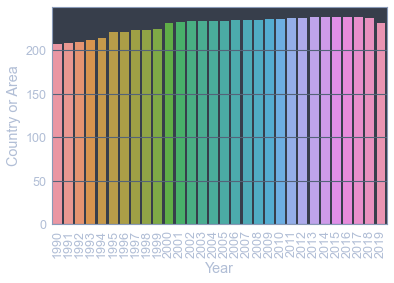

In [1065]:
sns.barplot(x = gdp_df.groupby('Year')['Country or Area'].count().index,
            y = gdp_df.groupby('Year')['Country or Area'].count())

ticks = plt.xticks(rotation = 90)

The years range from 1990 to 2019. A given year-country pair gets one row in the data set. Over the 30 years, the entries per year gradually increase, with the exception of 2019, where the total countries drops by 6.

# Problem 9
How many countries are represented in this dataset?

Which countries are least represented in the dataset?

Why do you think these countries have so few observations?

In [1066]:
#How many countries are in this dataset?
gdp_df['Country or Area'].value_counts()

Nigeria                      30
Post-demographic dividend    30
Belgium                      30
Zambia                       30
Burundi                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country or Area, Length: 238, dtype: int64

In [1067]:
#Which countries are least represented in the dataset?
gdp_df['Country or Area'].value_counts().tail(10)

Liberia                      20
Palau                        20
Kosovo                       20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country or Area, dtype: int64

There are 238 distinct countries in the dataset. The least represented countries are shown above. I would guess these countries were not officially recognized until the years when they appear in the dataset.

# Problem 10
Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [1068]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

# Problem 11
Use .describe() to find the summary statistics for GDP per capita in 2014.

In [1069]:
gdp_2014.describe()

,Year,Value
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


# Problem 12
Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:xlabel='Value', ylabel='Count'>

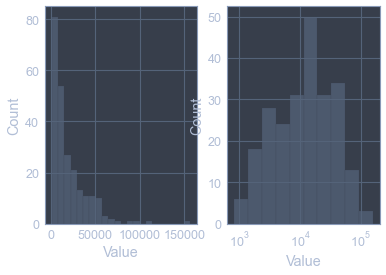

In [1070]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.histplot(gdp_2014['Value'], ax = ax1)
sns.histplot(gdp_2014['Value'], log_scale = True, ax = ax2)

The distribution is highly right-skewed. The histogram on the right shows that the distribution is log-normal.

# Problem 13
Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [1071]:
#top 5 in 2014
gdp_2014.sort_values('Value', ascending = False).head()

,Country or Area,Year,Value
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [1072]:
#bottom 5 in 2014
gdp_2014.sort_values('Value', ascending = False).tail()

,Country or Area,Year,Value
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777
1047,Central African Republic,2014,822.610458


# Problem 14
Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [1073]:
gdp_pivoted = gdp_df.pivot_table(values = 'Value', index = 'Country or Area', columns = 'Year').dropna(subset = [1990, 2017])
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country or Area,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485,11510.557088
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269,21910.184985
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826,14602.938214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,3128.469953,3153.015168
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941,16911.193295


# Problem 15
Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [1074]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Percent_Change
Country or Area,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485,11510.557088,34.197756
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297,26.411194
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269,21910.184985,28.335391
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826,14602.938214,50.138980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,3128.469953,3153.015168,7.905517
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551,327.655604
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941,16911.193295,67.902197


# Problem 16
How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [1075]:
print(gdp_pivoted.loc[gdp_pivoted['Percent_Change'] < 0, 'Percent_Change'].count(), "countries with negative percent change from 1990 to 2017.")

17 countries with negative percent change from 1990 to 2017.


# Problem 17
Which country had the highest % change in GDP per capita? 

Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

Bonus: Put both line charts on the same plot.

In [1076]:
#Which country had the highest % change in GDP per capita
max_change = gdp_pivoted['Percent_Change'].idxmax()
max_change

'Equatorial Guinea'

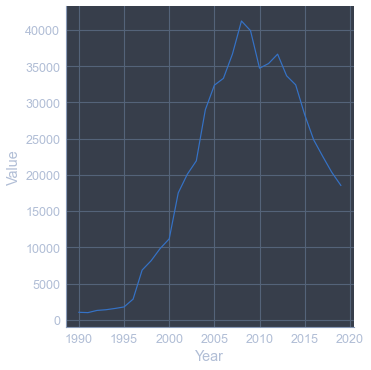

In [1077]:
# Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. 

sns.relplot(x = gdp_df.loc[gdp_df['Country or Area'] == max_change, 'Year'], y = gdp_df['Value'], kind = 'line')

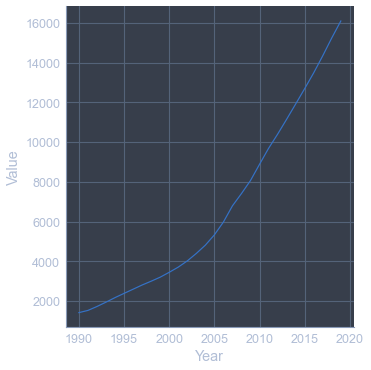

In [1078]:
# Create another showing the country with the second highest % change in GDP.
second_highest = gdp_pivoted['Percent_Change'].nlargest(2).iloc[[-1]].index[0]
second_highest
sns.relplot(x = gdp_df.loc[gdp_df['Country or Area'] == second_highest, 'Year'], y = gdp_df['Value'], kind = 'line')

Equatorial Guinea's GDP per Capita has rollercoastered. Despite having dropped dramatically since 2018, it's still increased the most proportionally. China, on the other hand, has increased with a near-linear trend.

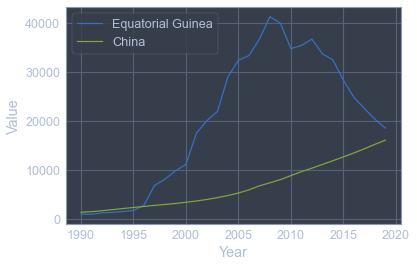

In [1079]:
#Bonus: Put both line charts on the same plot
fig, ax = plt.subplots()

sns.lineplot(x = gdp_df.loc[gdp_df['Country or Area'] == max_change, 'Year'], y = gdp_df['Value'])
sns.lineplot(x = gdp_df.loc[gdp_df['Country or Area'] == second_highest, 'Year'], y = gdp_df['Value'])
plt.legend(labels = ["Equatorial Guinea", "China"])

# Problem 18
Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [1080]:
continents = pd.read_csv('../data/continents.csv')

# Problem 19
Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [1081]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [1082]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


In [1083]:
gdp_df = (pd.merge(gdp_df, 
             continents, 
             how = 'inner', 
             left_on = 'Country or Area', 
             right_on = 'Country')
             .drop(columns = 'Country')
             .rename(columns = {'Country or Area': 'Country'})
                )
gdp_df

,Country,Year,Value,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


# Problem 20
Determine the number of countries per continent. Create a bar chart showing this.

In [1084]:
ccount = gdp_df.groupby('Continent')['Country'].nunique().sort_values(ascending = False)
ccount

Continent
Africa           49
Europe           45
Asia             43
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

C:\Users\jrior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Country', ylabel='Continent'>

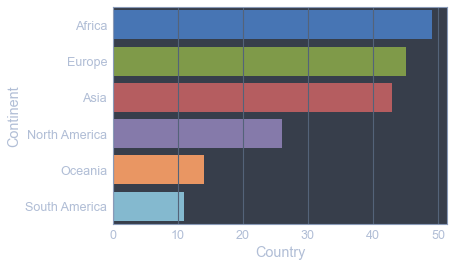

In [1085]:
sns.barplot(ccount, ccount.index, orient = 'h')

# Problem 21
Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

<AxesSubplot:xlabel='Value', ylabel='Continent'>

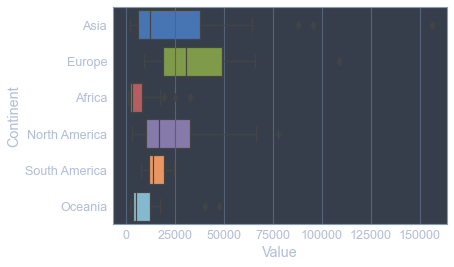

In [1086]:
sns.boxplot(x = 'Value', y = 'Continent', data = gdp_df[gdp_df['Year'] == 2014])

Europe seems to be a lot higher than all the other continents on average. Africa, on the other hand, is much lower. Asia's outliers really lie out.

# Problem 22
Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [1087]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


# Problem 23
Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [1088]:
internet_df = internet_df.drop(columns = 'Value Footnotes').rename(columns = {'Country or Area':'Country', 'Value': 'Internet_Users_Pct'})

# Problem 24
How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [1089]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


4495 rows and 3 columns. Internet_Users_Pct is a numeric type

# Problem 25
What is the first year that has a nonzero internet users percentage reported? 

What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [1090]:
# First year with nonzero internet users percentage reported.
internet_df.loc[internet_df['Internet_Users_Pct'] != 0.0, 'Year'].min()

1990

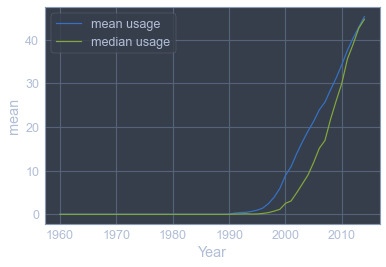

In [1091]:
# general trend
internet_years = internet_df.groupby('Year')['Internet_Users_Pct'].agg([np.mean, np.median])
sns.lineplot(x = internet_years.index, y = 'mean', data = internet_years)
sns.lineplot(x = internet_years.index, y = 'median', data = internet_years)
_ = plt.legend(['mean usage', 'median usage'])

Internet usages has trended up exponentially since 1990.

# Problem 26
Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [1092]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = 'inner')
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 0 to 3457
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3458 non-null   object 
 1   Year                3458 non-null   int64  
 2   Value               3458 non-null   float64
 3   Continent           3458 non-null   object 
 4   Internet_Users_Pct  3458 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 162.1+ KB


In [1093]:
gdp_and_internet_use_full = pd.merge(gdp_df, internet_df, how = 'outer')
gdp_and_internet_use_full.sort_values('Country')['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Rep.',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo (Democratic Republic of the)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', "Dem. People's Rep. of Korea", 'Dem. Rep. Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep.',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea',

In [1094]:
country_corrections = {
    'Brunei Darussalam':'Brunei',
    'Central African Rep.':'Central African Republic',
    'Congo (Democratic Republic of the)':'Dem. Rep. Congo',
    'Dominican Rep.':'Dominican Republic',
    'Hong Kong SAR, China': 'Hong Kong, China',
    'Iran (Islamic Rep. of)':'Iran',
    'Lao P.D.R.': 'Lao PDR',
    'Macao SAR, China': 'Macao, China',
    'Micronesia (Fed. States of)':'Micronesia',
    'T.F.Y.R. Macedonia':'North Macedonia',
    'Viet Nam':'Vietnam',
}

In [1095]:
for ind, row in internet_df.iterrows():
    if row['Country'] in country_corrections.keys():
        internet_df.at[ind, 'Country'] = country_corrections[row['Country']]
    else:
        pass

In [1096]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = 'inner')
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3641 entries, 0 to 3640
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3641 non-null   object 
 1   Year                3641 non-null   int64  
 2   Value               3641 non-null   float64
 3   Continent           3641 non-null   object 
 4   Internet_Users_Pct  3641 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 170.7+ KB


In [1097]:
gdp_and_internet_use['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dem. Rep. Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'I

# Problem 27
Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [1098]:
gdp_and_internet_use

,Country,Year,Value,Continent,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,Asia,6.390000
1,Afghanistan,2013,2116.465454,Asia,5.900000
2,Afghanistan,2012,2075.491747,Asia,5.454545
3,Afghanistan,2011,1904.559799,Asia,5.000000
4,Afghanistan,2010,1957.029338,Asia,4.000000
...,...,...,...,...,...
3636,Zimbabwe,1997,3580.048793,Africa,0.033080
3637,Zimbabwe,1996,3520.430146,Africa,0.016790
3638,Zimbabwe,1995,3226.413930,Africa,0.007684
3639,Zimbabwe,1994,3263.934978,Africa,0.001739


# Problem 28
Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. How many countries have at least 90% internet users in 2014?

In [1099]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,Value,Continent,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,Asia,6.39
13,Albania,2014,11623.866679,Europe,60.10
34,Algeria,2014,11512.705405,Africa,18.09
56,Angola,2014,8239.828837,Africa,21.26
76,Antigua and Barbuda,2014,18104.241470,North America,64.00
...,...,...,...,...,...
3536,Uzbekistan,2014,5764.492705,Asia,43.55
3557,Vanuatu,2014,3116.077025,Oceania,18.80
3577,Vietnam,2014,6098.489609,Asia,48.31
3597,Zambia,2014,3450.046561,Africa,17.34


In [1100]:
# Countries with at least 90% internet usage in 2014
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90, 'Country'].count()

13

# Problem 29
Find the countries that had the top 3 largest GDP per capita figures for 2014. 

Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [1101]:
# Top 3 GDP per capita in 2014
gdp_and_internet_use_2014.nlargest(3, 'Value')

,Country,Year,Value,Continent,Internet_Users_Pct
1920,Luxembourg,2014,108760.916030,Europe,94.67
2705,Qatar,2014,95578.416973,Asia,91.49
2914,Singapore,2014,87808.663157,Asia,82.00


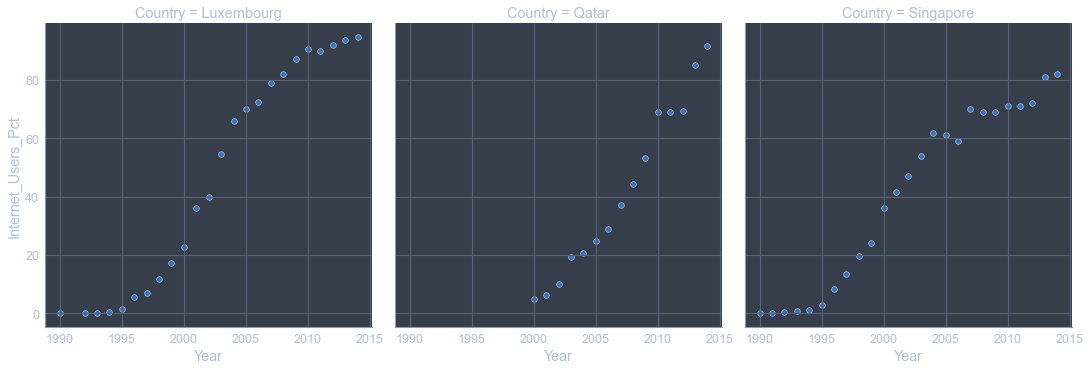

In [1102]:
# Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries.
# Each individual figure in the facet grid will represent a single country. 

gdp_top3_2014 = gdp_and_internet_use_2014.nlargest(3, 'Value')['Country']
sns.relplot(x = 'Year', 
            y = 'Internet_Users_Pct', 
            data = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(gdp_top3_2014)], 
            col = 'Country')

All of these countries' internet users percentages have steadily increased. Qatar started 10 years late than the others, which each began in the first year that we start to see internet usage reported.

Luxembourg takes almost exactly a cube-root graphical shape, and Singapore's is similar.

Each of the three graphs flattens for two or three years around 2010.

# Problem 30
Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

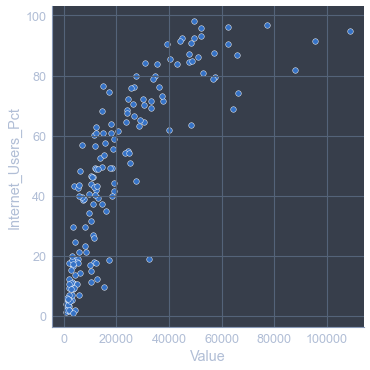

In [1103]:
_ = sns.relplot(x = 'Value', y = 'Internet_Users_Pct', data = gdp_and_internet_use_2014)

The data takes an almost perfectly logarithmic shape.

# Problem 31
Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [1104]:
gdp_and_internet_use_2014.corr()

,Year,Value,Internet_Users_Pct
Year,NaN,NaN,NaN
Value,NaN,1.000000,0.819233
Internet_Users_Pct,NaN,0.819233,1.000000


r = 0.824627. This number measures the strength of the linear correlation between Internet_Users_Pct and GDP per capita. There is a strong, positive linear correlation between these two variables.

# Problem 32
Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [1105]:
gdp_and_internet_use_2014['Value_Log'] = np.log(gdp_and_internet_use_2014['Value'])
gdp_and_internet_use_2014.corr()

<ipython-input-1105-4eb6cb6f6da3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Value,Internet_Users_Pct,Value_Log
Year,NaN,NaN,NaN,NaN
Value,NaN,1.000000,0.819233,0.860157
Internet_Users_Pct,NaN,0.819233,1.000000,0.900438
Value_Log,NaN,0.860157,0.900438,1.000000


The correlation with logarithmic GDP values is even stronger!

# Problem 33
Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

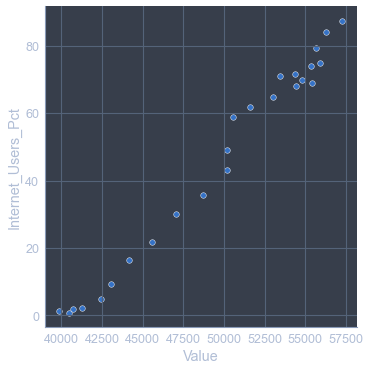

In [1106]:
usa_usa = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']
sns.relplot(x = 'Value', y = 'Internet_Users_Pct', data = usa_usa)

In [1107]:
usa_usa.corr()

,Year,Value,Internet_Users_Pct
Year,1.000000,0.96344,0.969113
Value,0.963440,1.00000,0.991660
Internet_Users_Pct,0.969113,0.99166,1.000000


There is a very strong linear correlation and a nearly perfect logarithmic correlation between the variables. This might be useful in studying the USA specifically; however, we wouldn't want to generalize to all countries, nor would we want to assume causality between these two variables.

# Solo Exploration
# Problem SE1
Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. 

Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. 

Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.

In [1108]:
intour = pd.read_excel("../data/inbound_tourism.xls", index_col = [0, 1, 2, 3, 4])
intour.head()

Units  \
Basic data and indicators                                                                            
AFGHANISTAN               NaN      NaN            NaN                               NaN        NaN   
                          Arrivals NaN            NaN                               NaN        NaN   
                                   Total arrivals NaN                               NaN  Thousands   
                                                  Overnights visitors (tourists)    NaN  Thousands   
                                                  Same-day visitors (excursionists) NaN  Thousands   

                                                                                        Notes  \
Basic data and indicators                                                                       
AFGHANISTAN               NaN      NaN            NaN                               NaN   NaN   
                          Arrivals NaN            NaN                               NaN   NaN   
                                   Total arrivals NaN                               NaN   NaN   
                                                  Overnights visitors (tourists)    NaN   NaN   
                                                  Same-day visitors (excursionists) NaN   NaN   

                                                                                        Series  \
Basic data and indicators                                                                        
AFGHANISTAN               NaN      NaN            NaN                               NaN    NaN   
                          Arrivals NaN            NaN                               NaN    NaN   
                                   Total arrivals NaN                               NaN    NaN   
                                                  Overnights visitors (tourists)    NaN    NaN   
                                                  Same-day visitors (excursionists) NaN    NaN   

                                                                                        1995  \
Basic data and indicators                                                                      
AFGHANISTAN               NaN      NaN            NaN                               NaN  NaN   
                          Arrivals NaN            NaN                               NaN  NaN   
                                   Total arrivals NaN                               NaN   ..   
                                                  Overnights visitors (tourists)    NaN   ..   
                                                  Same-day visitors (excursionists) NaN   ..   

                                                                                        1996  \
Basic data and indicators                                                                      
AFGHANISTAN               NaN      NaN            NaN                               NaN  NaN   
                          Arrivals NaN            NaN                               NaN  NaN   
                                   Total arrivals NaN                               NaN   ..   
                                                  Overnights visitors (tourists)    NaN   ..   
                                                  Same-day visitors (excursionists) NaN   ..   

                                                                                        1997  \
Basic data and indicators                                                                      
AFGHANISTAN               NaN      NaN            NaN                               NaN  NaN   
                          Arrivals NaN            NaN                               NaN  NaN   
                                   Total arrivals NaN                               NaN   ..   
                                                  Overnights visitors (tourists)    NaN   ..   
                                                  Same-day visitors (excursionists) NaN  

In [1109]:
garbage = ['Notes', 'Series', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62']
intour.drop(columns = garbage, inplace = True)
intour = intour.loc[:,'Tourism expenditure in the country', 'Travel',:]
intour.index = intour.index.droplevel(level = [1,2])
intour = intour.drop(columns = 'Units')
intour.index.rename('Country', inplace = True)

In [1110]:
intour = intour.replace('..', np.nan)
for col in intour.columns:
    intour[col] = intour[col].astype('float')

In [1111]:
intour_long = intour.melt(var_name = 'Year', value_name = 'Tourism_$mil', ignore_index = False).reset_index()
intour_long

,Country,Year,Tourism_$mil
0,AFGHANISTAN,1995,NaN
1,ALBANIA,1995,65.0
2,ALGERIA,1995,32.0
3,AMERICAN SAMOA,1995,NaN
4,ANDORRA,1995,NaN
...,...,...,...
5570,"VENEZUELA, BOLIVARIAN REPUBLIC OF",2019,NaN
5571,VIET NAM,2019,NaN
5572,YEMEN,2019,NaN
5573,ZAMBIA,2019,819.0


In [1112]:
internet_df['Country'] = internet_df['Country'].str.upper()
internet_df

,Country,Year,Internet_Users_Pct
0,AFGHANISTAN,2014,6.390000
1,AFGHANISTAN,2013,5.900000
2,AFGHANISTAN,2012,5.454545
3,AFGHANISTAN,2011,5.000000
4,AFGHANISTAN,2010,4.000000
...,...,...,...
4490,ZIMBABWE,1997,0.033080
4491,ZIMBABWE,1996,0.016790
4492,ZIMBABWE,1995,0.007684
4493,ZIMBABWE,1994,0.001739


In [1113]:
internet_tourism = internet_df.merge(intour_long, how = 'inner')
internet_tourism

,Country,Year,Internet_Users_Pct,Tourism_$mil
0,AFGHANISTAN,2014,6.390000,109.0
1,AFGHANISTAN,2013,5.900000,138.0
2,AFGHANISTAN,2012,5.454545,102.0
3,AFGHANISTAN,2011,5.000000,85.0
4,AFGHANISTAN,2010,4.000000,75.0
...,...,...,...,...
3401,ZIMBABWE,1999,0.161676,NaN
3402,ZIMBABWE,1998,0.081648,NaN
3403,ZIMBABWE,1997,0.033080,NaN
3404,ZIMBABWE,1996,0.016790,NaN


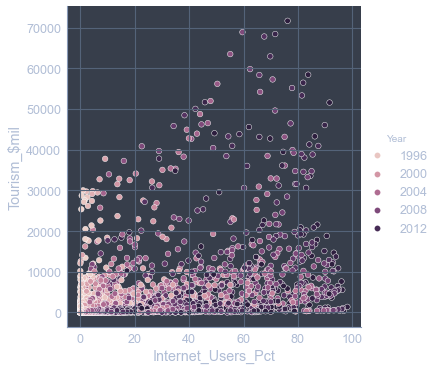

In [1114]:
sns.relplot(x = 'Internet_Users_Pct', y = 'Tourism_$mil', data = internet_tourism, hue = 'Year')

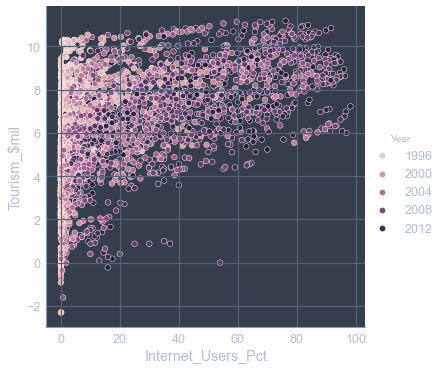

In [1115]:
sns.relplot(x = 'Internet_Users_Pct', y = np.log(internet_tourism['Tourism_$mil']), data = internet_tourism, hue = 'Year')

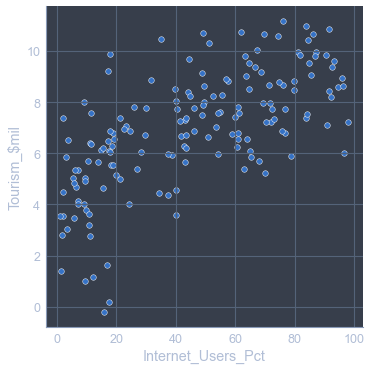

In [1116]:
sns.relplot(x = 'Internet_Users_Pct', y = np.log(internet_tourism['Tourism_$mil']), data = internet_tourism[internet_tourism['Year'] == 2014])

In [1117]:
internet_tourism['Tourism_$mil_log'] = np.log(internet_tourism['Tourism_$mil'])

In [1118]:
internet_tourism.corr()

,Internet_Users_Pct,Tourism_$mil,Tourism_$mil_log
Internet_Users_Pct,1.000000,0.410318,0.537206
Tourism_$mil,0.410318,1.000000,0.622009
Tourism_$mil_log,0.537206,0.622009,1.000000


In [1119]:
internet_tourism[internet_tourism['Year'] == 2014].corr()

,Internet_Users_Pct,Tourism_$mil,Tourism_$mil_log
Internet_Users_Pct,1.000000,0.402694,0.653779
Tourism_$mil,0.402694,1.000000,0.652071
Tourism_$mil_log,0.653779,0.652071,1.000000


In [1120]:
# # Two dropdown filters with a dataframe displayed

# ALL = 'ALL'

# def unique_sorted_values_plus_ALL(array):
#     unique_all = array.unique().tolist()
#     unique_all.sort()
#     unique_all.insert(0, ALL)
#     return unique_all

# output = widgets.Output()

# dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(internet_tourism['Year']),
#                                 description = "Year: ")

# dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(internet_tourism['Country']),
#                                 description = "Country: ")

# def common_filtering(Year, Country):
#     output.clear_output()
    
#     if (Year == ALL) & (Country == ALL):
#         common_filter = internet_tourism
#     elif (Year == ALL):
#         common_filter = internet_tourism[internet_tourism['Country'] == Country]
#     elif (Country == ALL):
#         common_filter = internet_tourism[internet_tourism['Year'] == Year]
#     else:
#         common_filter = internet_tourism[(internet_tourism['Country'] == Country)
#                                         &
#                                         (internet_tourism['Year'] == Year)]
#     with output:
#         display(common_filter)
        
# def dropdown_year_eventhandler(change):
#     common_filtering(change.new, dropdown_country.value)
    
# def dropdown_country_eventhandler(change):
#     common_filtering(dropdown_year.value, change.new)
    
# dropdown_year.observe(dropdown_year_eventhandler, names = 'value')
# dropdown_country.observe(dropdown_country_eventhandler, names = 'value')

# display(dropdown_year)
# display(dropdown_country)
# display(output)

In [1121]:
# Two dropdown filters for scatterplot (functional)

ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique_all = array.unique().tolist()
    unique_all.sort()
    unique_all.insert(0, ALL)
    return unique_all


plot_output = widgets.Output()

dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(internet_tourism['Year']),
                                description = "Year: ")

dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(internet_tourism['Country']),
                                description = "Country: ")

def common_filtering(Year, Country):
    plot_output.clear_output()
    
    if (Year == ALL) & (Country == ALL):
        common_filter = internet_tourism
    elif (Year == ALL):
        common_filter = internet_tourism[internet_tourism['Country'] == Country]
    elif (Country == ALL):
        common_filter = internet_tourism[internet_tourism['Year'] == Year]
    else:
        common_filter = internet_tourism[(internet_tourism['Country'] == Country)
                                        &
                                        (internet_tourism['Year'] == Year)]
    with plot_output:
        sns.relplot(x = 'Internet_Users_Pct', y = 'Tourism_$mil', data = common_filter, hue = 'Country', legend = False)
        #sns.relplot(x = 'Internet_Users_Pct', y = np.log('Tourism_$mil'), data = internet_tourism, hue = 'Country')
        plt.show()
        
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_country.value)
    
def dropdown_country_eventhandler(change):
    common_filtering(dropdown_year.value, change.new)
    
dropdown_year.observe(dropdown_year_eventhandler, names = 'value')
dropdown_country.observe(dropdown_country_eventhandler, names = 'value')

input_widgets = widgets.HBox([dropdown_year, dropdown_country])

display(input_widgets)
display(plot_output)

Output()

In [1122]:
# # year IntSlider and Country MultiSelect, not yet functional for Country == ALL

# ALL = 'ALL'

# def unique_sorted_values_plus_ALL(array):
#     unique_all = array.unique().tolist()
#     unique_all.sort()
#     unique_all.insert(0, ALL)
#     return unique_all


# plot_output = widgets.Output()

# # dropdown_year = widgets.IntSlider(value = 2010,
# #                                   min = 1990,
# #                                   max = 2020,
# #                                   step = 1,
# #                                   description = "Year: ",
# #                                   disabled = False,
# #                                   continuous_update = False,
# #                                   orientation = 'horizontal',
# #                                   readout = True,
# #                                   readout_format = 'd')

# dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(internet_tourism['Year']),
#                                 description = "Year: ")

# dropdown_country = widgets.SelectMultiple(options = unique_sorted_values_plus_ALL(internet_tourism['Country']),
#                                             value = ['ALL'],
#                                             description = "Country: ",
#                                             disabled = False)

# def common_filtering(Year, Country):
#     plot_output.clear_output()
    
#     if (Year == ALL) & (Country == ALL):
#         common_filter = internet_tourism
#     elif (Year == ALL):
#         common_filter = internet_tourism[internet_tourism['Country'].isin(Country)]
#     elif (Country == ALL):
#         common_filter = internet_tourism[internet_tourism['Year'] == Year]
#     else:
#         common_filter = internet_tourism[(internet_tourism['Country'].isin(Country))
#                                         &
#                                         (internet_tourism['Year'] == Year)]
#     with plot_output:
#         sns.relplot(x = 'Internet_Users_Pct', 
#                     y = 'Tourism_$mil', 
#                     data = common_filter, 
#                     hue = 'Country', 
#                     #legend = False
#                    )
#         #sns.relplot(x = 'Internet_Users_Pct', y = np.log('Tourism_$mil'), data = internet_tourism, hue = 'Country')
#         plt.show()
        
# def dropdown_year_eventhandler(change):
#     common_filtering(change.new, dropdown_country.value)
    
# def dropdown_country_eventhandler(change):
#     common_filtering(dropdown_year.value, change.new)
    
# dropdown_year.observe(dropdown_year_eventhandler, names = 'value')
# dropdown_country.observe(dropdown_country_eventhandler, names = 'value')

# display(dropdown_year)
# display(dropdown_country)
# display(plot_output)

# Problem SE2
If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.

In [1123]:
fig = px.scatter(internet_tourism,
                x = 'Internet_Users_Pct',
                y = 'Tourism_$mil',
                color = 'Country')
fig.show()